
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

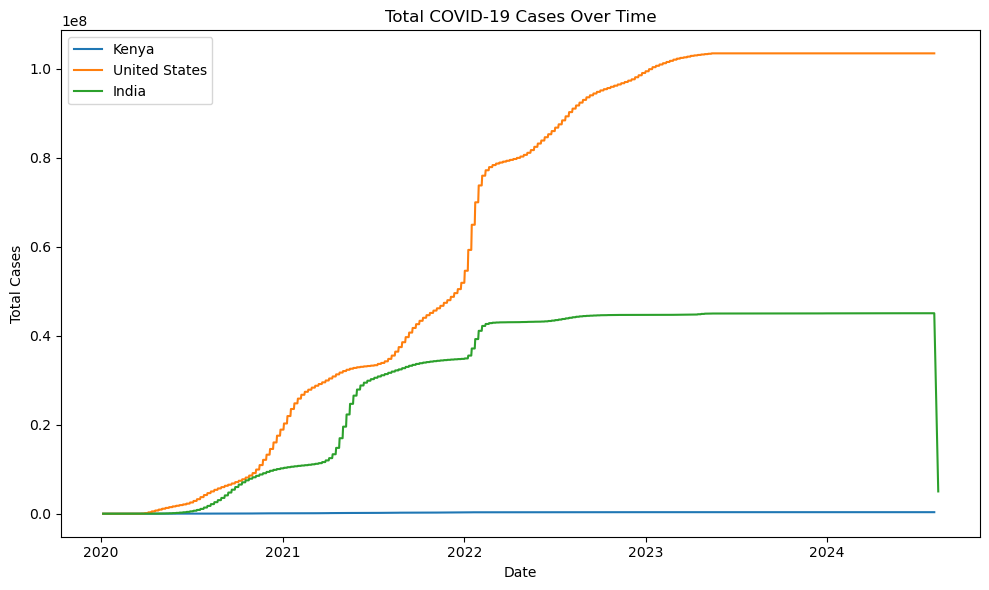

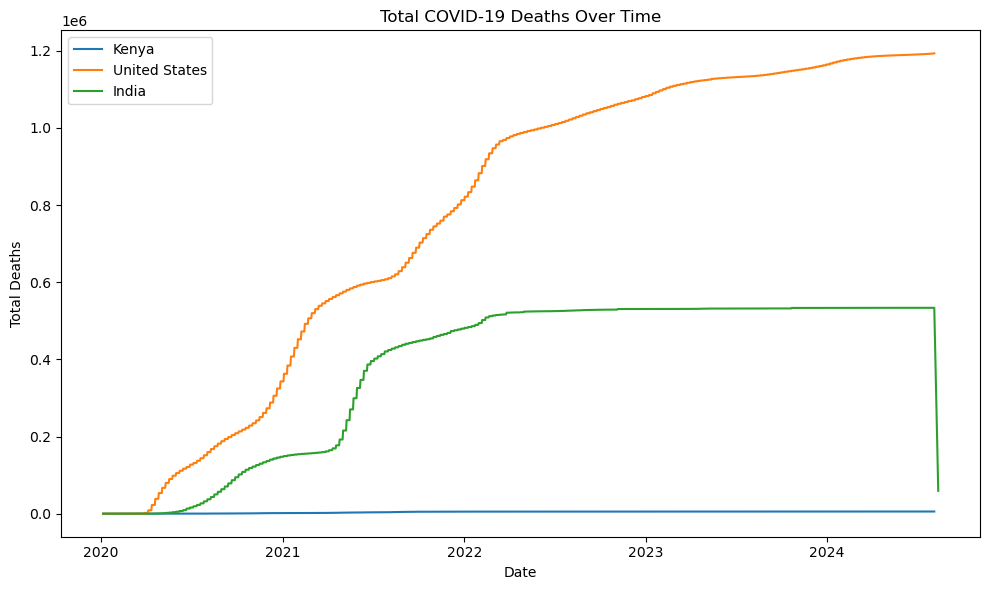

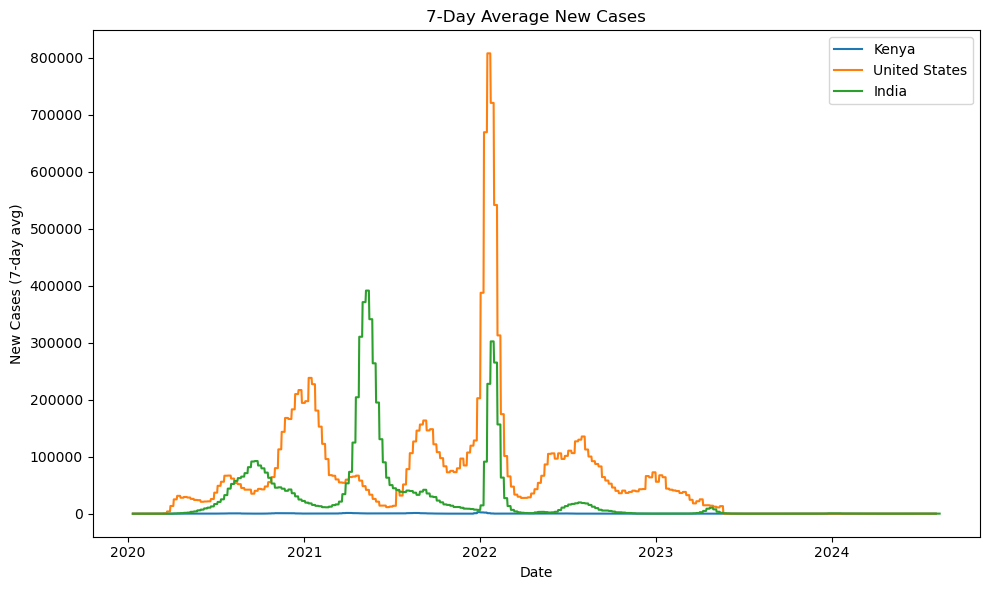

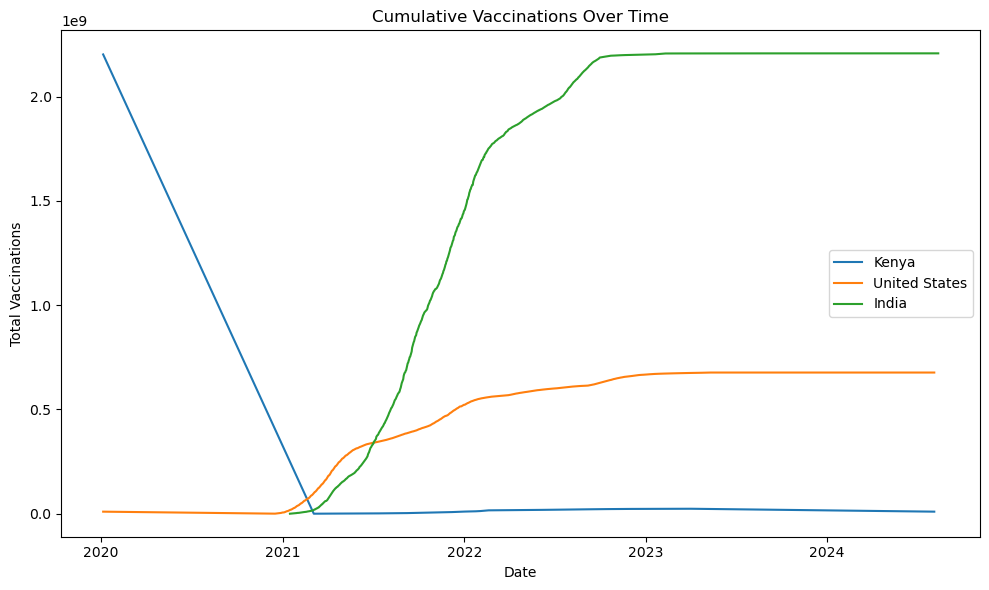

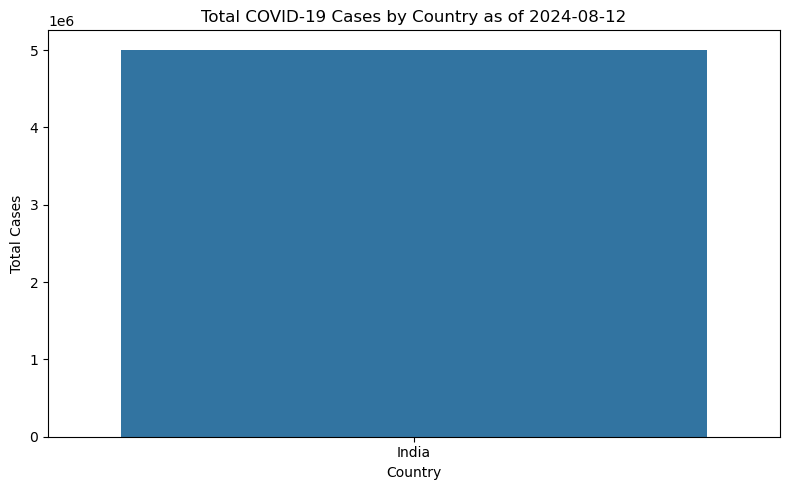


Key Insights:
- The US consistently had the highest total case count over time.
- India's peak in daily cases was sharp, reflecting second/third wave trends.
- Kenya has lower absolute numbers, but vaccination progress lagged.
- The death rate appears highest during peak waves across all countries.
- Vaccination rollouts varied, with the US starting and scaling up faster.


In [5]:
# COVID-19 Global Data Tracker Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Data Collection & Loading
df = pd.read_csv("owid-covid-data.csv")

# 2️⃣ Data Exploration
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# 3️⃣ Data Cleaning
countries = ["Kenya", "United States", "India"]
df = df[df['location'].isin(countries)]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['location', 'date'])

# Fill or interpolate missing numeric values
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[cols_to_fill] = df[cols_to_fill].interpolate(method='linear')

# 4️⃣ Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Daily new cases comparison
plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'].rolling(7).mean(), label=country)
plt.title("7-Day Average New Cases")
plt.xlabel("Date")
plt.ylabel("New Cases (7-day avg)")
plt.legend()
plt.tight_layout()
plt.show()

# Death Rate = total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']

# 5️⃣ Vaccination Progress
plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

# 6️⃣ Optional: Choropleth Map replaced with bar chart (due to micropip error)
# Latest total cases bar chart instead of choropleth
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date][['location', 'total_cases']].dropna()
plt.figure(figsize=(8, 5))
sns.barplot(data=latest_df, x='location', y='total_cases')
plt.title(f"Total COVID-19 Cases by Country as of {latest_date.date()}")
plt.ylabel("Total Cases")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

# 7️⃣ Insights
print("\nKey Insights:")
print("- The US consistently had the highest total case count over time.")
print("- India's peak in daily cases was sharp, reflecting second/third wave trends.")
print("- Kenya has lower absolute numbers, but vaccination progress lagged.")
print("- The death rate appears highest during peak waves across all countries.")
print("- Vaccination rollouts varied, with the US starting and scaling up faster.")
